## **Bernoulli**

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Ejercicio 1: Carga y visualización inicial de datos

Carga el conjunto de datos llamado `corpus_bernuilli.csv`. Este archivo contiene frases clasificadas en categorías y está separado por `,`.

Las columnas del archivo son:

- **frase:** Texto compuesto por una oración.
- **etiqueta:** Categoría asignada a la oración: `videojuego`, `película`.

Realiza las siguientes acciones:

1. Carga el archivo CSV usando `pandas`.
2. Muestra las primeras 5 filas del dataset.

In [11]:
df = pd.read_csv("corpus_bernuilli.csv", sep=",")
print(df.head(5))

                                               frase    etiqueta
0  La nueva actualización del videojuego ha mejor...  videojuego
1  El jugador experimentado desbloqueó un logro e...  videojuego
2  El lanzamiento oficial del próximo videojuego ...  videojuego
3  Durante la última partida multijugador, los us...  videojuego
4  El nivel final del juego incluye un jefe muy p...  videojuego


# Ejercicio 2: Tokenización y eliminación de stopwords en español

Utiliza `CountVectorizer` de `sklearn.feature_extraction.text` para convertir las frases en una representación numérica (bag-of-words).  
1. Descarga y usa la lista de **stopwords en español** del paquete `nltk.corpus.stopwords` para configurar el parámetro `stop_words` del vectorizador.  
2. Configura el `CountVectorizer` para:  
   - Usar las stopwords en español proporcionadas (`stop_words=stop_words_spanish`).  
   - Transformar todo a minúsculas automáticamente (`lowercase=True`).  
   - Binarización (`binary=True`).  
3. Extra `X` aplicando el vectorizador a la columna `frase` del dataset mediante la función `vectorizer.fit_transform(df['frase'])`
4. Muestra las 10 primeras frases transformadas como vectores y las palabras (características) correspondientes.

Usa `vectorizer.get_feature_names_out()` para obtener las palabras del vocabulario y `toarray()` para visualizar las frases como vectores.


In [13]:
stop_words_spanish = stopwords.words('spanish')

vectorizer = CountVectorizer(
    stop_words=stop_words_spanish,  
    lowercase=True,                 
    binary=True                     
)

X = vectorizer.fit_transform(df['frase'])

print("\nPrimeras 10 frases transformadas:")
print(X.toarray()[:10])

print("Palabras (vocabulario):")
print(vectorizer.get_feature_names_out())


Primeras 10 frases transformadas:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Palabras (vocabulario):
['abierto' 'aborda' 'accesorios' 'acciones' 'acción' 'activa' 'actor'
 'actores' 'actriz' 'actuación' 'actualización' 'actualizado' 'adaptado'
 'adicional' 'afectaban' 'aficionados' 'agregaron' 'ahora' 'ajustada'
 'alcanzó' 'aliados' 'altamente' 'ambienta' 'ambientes' 'ampliada'
 'ampliado' 'ampliará' 'anunciaron' 'anunció' 'aplicar' 'aportan' 'aportó'
 'aprendizaje' 'armas' 'artificial' 'artística' 'aspectos' 'atmósfera'
 'audiencia' 'audiencias' 'audio' 'autenticidad' 'autor' 'avance'
 'avanzada' 'añade' 'añadirá' 'años' 'balanceado' 'banda' 'basado' 'basó'
 'batalla' 'batallas' 'bellos' 'bestseller' 'beta' 'bien' 'biomas' 'cada'
 'calidad' 'cambios' 'campaña' 'campo' 'cantidad' 'capa' 'capacidad'
 'capturó' 'causó' 'cautivó' 'caídas' 'cerrada' 'cine' 'cineasta'
 'cinematografía' 'cinematográfica' 'cines' 'c

# Ejercicio 3: División del conjunto de datos en entrenamiento y prueba
1. Asigna:
   - Las características vectorizadas a `X`.
   - Las etiquetas a `y`.
2. Divide el conjunto de datos en dos partes:
   - Conjunto de **entrenamiento** (aproximadamente el 70% de los datos).
   - Conjunto de **prueba** (el 30% restante).
3. Utiliza la función `train_test_split` del módulo `sklearn.model_selection`.

4. Usa `random_state=42` para asegurar reproducibilidad.
5. Imprime la cantidad de muestras que hay en cada conjunto.

Sugerencia: `X_train.shape[0]` y `X_test.shape[0]` te pueden ayudar a contar los elementos en cada partición.


In [14]:
y = df['etiqueta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Número de muestras en entrenamiento:", X_train.shape[0])
print("Número de muestras en prueba:", X_test.shape[0])

Número de muestras en entrenamiento: 63
Número de muestras en prueba: 27


# Ejercicio 4: Entrenamiento y evaluación con Bernoulli Naive Bayes


1. Entrena un modelo `BernoulliNB` de `sklearn.naive_bayes` utilizando los datos de entrenamiento (`X_train` y `y_train`).
2. Realiza predicciones sobre los datos de prueba (`X_test`).
3. Calcula e imprime la **precisión** del modelo usando `accuracy_score` de `sklearn.metrics`.

> Sugerencia: Puedes aplicar el umbral binario con `X_train_binary = (X_train > 0).astype(int)`


In [15]:
X_train_binary = (X_train > 0).astype(int)
X_test_binary = (X_test > 0).astype(int)

model = BernoulliNB()

model.fit (X_train_binary, y_train)

y_pred = model.predict (X_test_binary)

accuracy = accuracy_score(y_test, y_pred)

print("Precision del modelo:", accuracy)

Precision del modelo: 0.9259259259259259


# Ejercicio 5: Matriz de confusión

1. Calcula y muestra la matriz de confusión para las predicciones realizadas en el conjunto de prueba.  
2. Usa `confusion_matrix` de `sklearn.metrics`.  
3. Visualiza la matriz de confusión usando `ConfusionMatrixDisplay` para mejorar la interpretación.
4. Interpreta y justifica el resultado.


El modelo tuvo 25 predicciones de 27 correctas, en el caso del 0 tuvo 12 aciertos y 0 fallos, mientras que en el caso del 1 tuvo 13 aciertos y 2 fallos. Esto quiere decir que es muy bueno para detectar clase 0 y bastante bueno para detectar clase 1


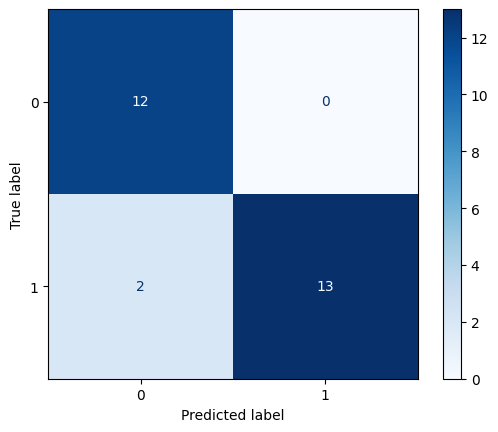

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix (y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues') 

print ("El modelo tuvo 25 predicciones de 27 correctas, en el caso del 0 tuvo 12 aciertos y 0 fallos, mientras que en el caso del 1 tuvo 13 aciertos y 2 fallos. Esto quiere decir que es muy bueno para detectar clase 0 y bastante bueno para detectar clase 1")

## **Multinomial**

# Ejercicio 1: Carga y visualización inicial de datos

Carga el conjunto de datos llamado `corpus_multinomial.csv`. Este archivo contiene frases clasificadas en categorías y está separado por `;`.

Las columnas del archivo son:

- **frase:** Texto compuesto por varias oraciones relacionadas.
- **etiqueta:** Categoría asignada a la oración: `deportes`, `politica`, `tecnologia`, `entretenimiento`.

Realiza las siguientes acciones:

1. Carga el archivo CSV usando `pandas`, indicando que el separador es `;`.
2. Muestra las primeras 5 filas del dataset.


In [17]:
df = pd.read_csv("corpus_multinomial.csv", sep=";")
print(df.head(5))

                                               frase  etiqueta
0  El jugador marcó un gol decisivo. El jugador f...  deportes
1  El estadio vibró con cada gol del equipo. El e...  deportes
2  La selección nacional ganó el partido con un r...  deportes
3  El estadio vibró con cada gol del equipo. El e...  deportes
4  El jugador marcó un gol decisivo. El jugador f...  deportes


# Ejercicio 2: Tokenización y eliminación de stopwords en español

1. Utiliza `CountVectorizer` de `sklearn.feature_extraction.text` para convertir las frases en una representación numérica (bag-of-words).  
2. Descarga y usa la lista de **stopwords en español** del paquete `nltk.corpus.stopwords` para configurar el parámetro `stop_words` del vectorizador.  
3. Configura el `CountVectorizer` para:  
   - Usar las stopwords en español proporcionadas por `nltk`.  
   - Transformar todo a minúsculas automáticamente (`lowercase=True`).  
4. Aplica el vectorizador a la columna `frase` del dataset.  
5. Muestra las 10 primeras frases transformadas como vectores y las palabras (características) correspondientes.


In [18]:
stop_words_spanish = stopwords.words('spanish')

vectorizer = CountVectorizer (
    stop_words = stop_words_spanish,
    lowercase = True,
    )

X = vectorizer.fit_transform(df['frase'])

print("\nPrimeras 10 frases transformadas:")
print(X.toarray()[:10])

print("Palabras (vocabulario):")
print(vectorizer.get_feature_names_out())


Primeras 10 frases transformadas:
[[1 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Palabras (vocabulario):
['aclamó' 'actual' 'actualización' 'además' 'afición' 'afirmó' 'ahora'
 'anunciado' 'aplaudida' 'apple' 'aprobada' 'aprobó' 'aprovechó'
 'artistas' 'atrajo' 'audiencia' 'avanza' 'beneficiosa' 'buenas' 'busca'
 'cada' 'calidad' 'canciones' 'cantante' 'características' 'celebró'
 'clave' 'comentaron' 'compiten' 'configuraciones' 'confía' 'conseguido'
 'considera' 'consiguió' 'constante' 'contiene' 'convertido' 'critica'
 'criticó' 'críticas' 'críticos' 'cultural' 'datos' 'debate' 'debatida'
 'decisivo' 'defendió' 'demostración' 'descargan' 'destaca' 'destacan'
 'destacó' 'diez' 'dio' 'discutió' 'diseño' 'dispositivo' 'dominó'
 'duramente' 'economía' 'económica' 'edición' 'efectos' 'elogiada'
 'elogios' 'emocionados' 'empresa' 'empresas' 'entrenador' 'entusiasmo'
 'equipo' 'escepticismo' 'escuchar' 'especiales' '

# Ejercicio 3: División del conjunto de datos en entrenamiento y prueba
1. Asigna:  
   - Las características vectorizadas a `X`.  
   - Las etiquetas a `y`.
2. Divide el conjunto de datos en dos partes:  
   - Conjunto de **entrenamiento** (aproximadamente el 70% de los datos).  
   - Conjunto de **prueba** (el 30% restante).  
3. Utiliza la función `train_test_split` del módulo `sklearn.model_selection`.  

4. Usa `random_state=42` para asegurar reproducibilidad.  
5. Imprime la cantidad de muestras que hay en cada conjunto.



In [20]:
y = df['etiqueta']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

print("Número de muestras en entrenamiento:", X_train.shape[0])
print("Número de muestras en prueba:", X_test.shape[0])

Número de muestras en entrenamiento: 70
Número de muestras en prueba: 30


# Ejercicio 4: Entrenamiento y evaluación con Multinomial Naive Bayes

1. Utiliza el modelo `MultinomialNB` de `sklearn.naive_bayes` para entrenar con los datos de entrenamiento (`X_train` y `y_train`).  
2. Realiza predicciones sobre los datos de prueba (`X_test`).  
3. Calcula e imprime las siguientes métricas de evaluación:  
   - **Precisión** (`accuracy_score`)  
   - **Precisión por clase** (`precision_score`)  
   - **Recall por clase** (`recall_score`)  
   - **F1-score por clase** (`f1_score`)  

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = MultinomialNB()

model.fit (X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

precision_class = precision_score(y_test, y_pred, average='weighted')

recall_class = recall_score(y_test, y_pred, average='weighted')

f1_class = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision_class)
print("Recall:", recall_class)
print("F1-score:", f1_class)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


# Ejercicio 5: Matriz de confusión

1. Calcula y muestra la matriz de confusión para las predicciones realizadas en el conjunto de prueba.  
2. Usa `confusion_matrix` de `sklearn.metrics`.  
3. Interpreta y justifica el resultado.


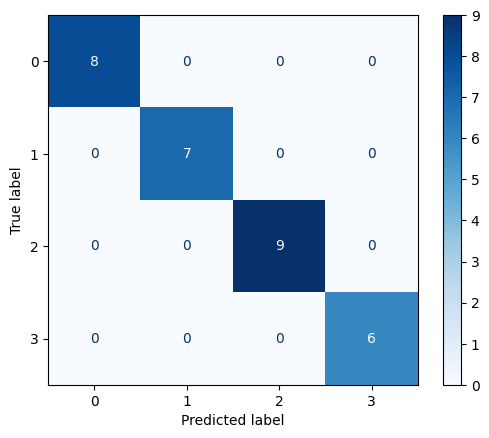

In [23]:
cm = confusion_matrix (y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues') 

## **Gaussiana**

# Ejercicio 1: Carga y visualización inicial de datos

Carga el conjunto de datos llamado `excusas_tarea.csv`. Este archivo contiene características numéricas y una etiqueta categórica para calcular cuando una excusa por entregar una tarea tarde es creible.

Las columnas del archivo son:

- **PorcentajeVerdad:** Porcentaje estimado de verdad de la excusa.  
- **NivelDramatismo:** Nivel de dramatismo de la excusa.  
- **VecesUsadaAntes:** Cantidad de veces que se ha usado esta excusa anteriormente.  
- **LongitudExcusa:** Longitud (en número de caracteres o palabras) de la excusa.  
- **Clase:** Etiqueta que indica la credibilidad de la excusa (`Totalmente creíble`, `Algo creíble`, `Dudosa`, `Poco creíble`, `Totalmente ridícula`).

Realiza las siguientes acciones:

1. Carga el archivo CSV usando `pandas`.  
2. Muestra las primeras 5 filas del dataset.


In [24]:
df = pd.read_csv("corpus_gaussiana.csv")
print(df.head(5))

   PorcentajeVerdad  NivelDramatismo  VecesUsadaAntes  LongitudExcusa  \
0         86.154845        12.065419                0              21   
1         86.730709        10.729699                2              11   
2         86.289171        37.878458                0              22   
3         82.575453        49.890221                1              17   
4         81.748937        45.864411                1              11   

                Clase  
0  Totalmente creíble  
1  Totalmente creíble  
2  Totalmente creíble  
3  Totalmente creíble  
4  Totalmente creíble  


# Ejercicio 2: Preparación de datos para el modelo Gaussiano

1. Selecciona las columnas numéricas como características (todas excepto la columna `Clase`).  
2. Asigna la columna `Clase` como variable objetivo (etiquetas).  
3. Divide el conjunto de datos en entrenamiento (70%) y prueba (30%) usando `train_test_split` con `random_state=42`.  
4. Imprime la cantidad de muestras en cada conjunto.


In [25]:
X = df[['PorcentajeVerdad', 'NivelDramatismo', 'VecesUsadaAntes', 'LongitudExcusa']]
y = df['Clase']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

print("Número de muestras en entrenamiento:", X_train.shape[0])
print("Número de muestras en prueba:", X_test.shape[0])

Número de muestras en entrenamiento: 70
Número de muestras en prueba: 30


# Ejercicio 3: Entrenamiento y evaluación con Gaussian Naive Bayes

1. Entrena un modelo `GaussianNB` de `sklearn.naive_bayes` con los datos de entrenamiento.  
2. Realiza predicciones sobre el conjunto de prueba.  
3. Calcula e imprime las siguientes métricas de evaluación:  
   - **Precisión** (`accuracy_score`)  
   - **Precisión por clase** (`precision_score`)  
   - **Recall por clase** (`recall_score`)  
   - **F1-score por clase** (`f1_score`)  
   
   Recuerda usar `average='weighted'` en las métricas para un mejor manejo del desbalance.


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = GaussianNB()
model.fit (X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

precision_class = precision_score(y_test, y_pred, average='weighted')

recall_class = recall_score(y_test, y_pred, average='weighted')

f1_class = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision_class)
print("Recall:", recall_class)
print("F1-score:", f1_class)


Accuracy: 0.6666666666666666
Precision: 0.6928571428571428
Recall: 0.6666666666666666
F1-score: 0.6725330225330225


# Ejercicio 4: Matriz de confusión

1. Calcula y muestra la matriz de confusión para las predicciones realizadas en el conjunto de prueba.  
2. Usa `confusion_matrix` de `sklearn.metrics`.  
3. Opcional: Visualiza la matriz de confusión usando `ConfusionMatrixDisplay` para una interpretación más clara.


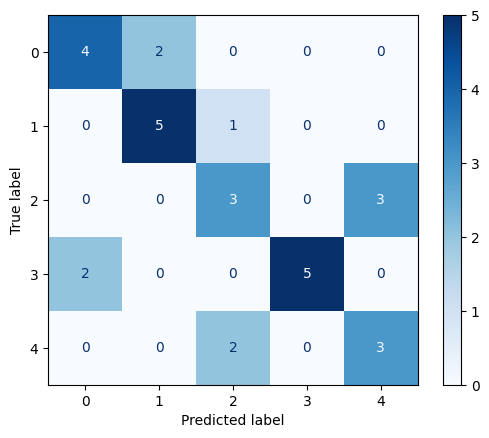

In [27]:
cm = confusion_matrix (y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues') 

# Ejercicio 5: Muestra las distribuciones

Usa el siguiente código para mostrar las distribuciones. Puede que tengas que adaptar las variables `X` y `modelo` a las que has usado en tu solución. Justifica el resultado.

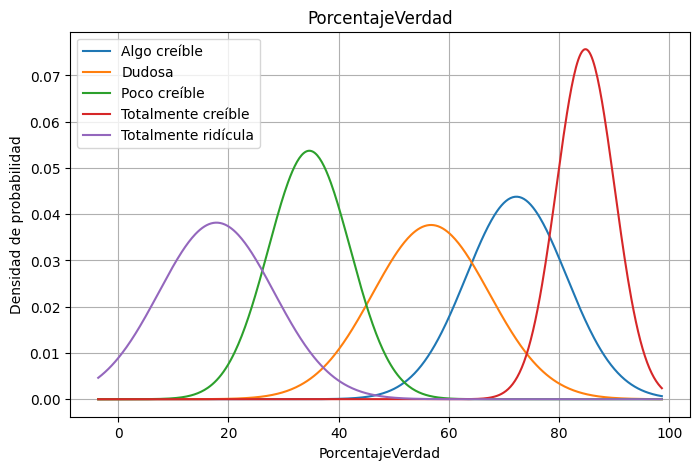

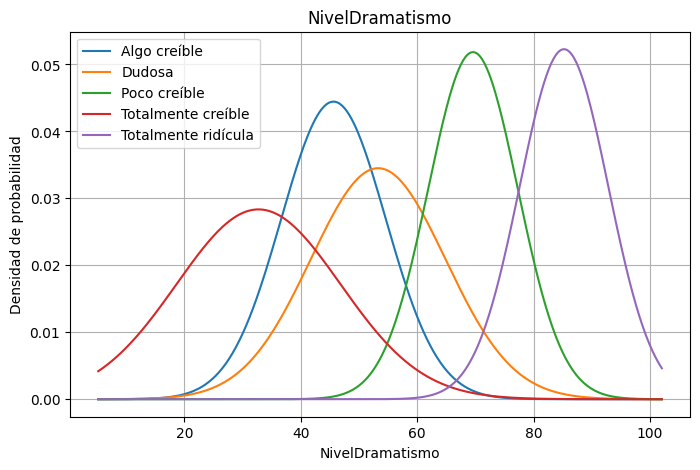

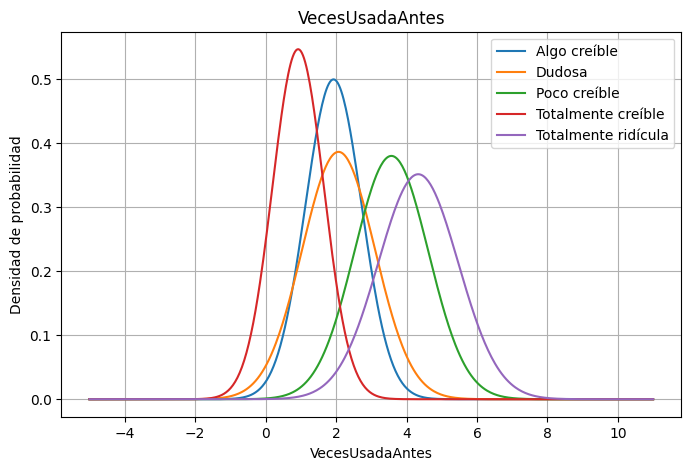

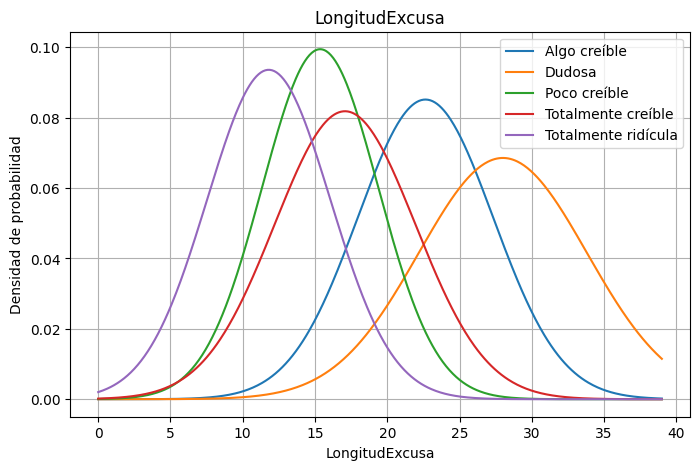

In [32]:
clases_unicas = sorted(y.unique())
variables = ['PorcentajeVerdad', 'NivelDramatismo', 'VecesUsadaAntes', 'LongitudExcusa']

for var_idx, var_name in enumerate(variables):
    x_vals = np.linspace(
        np.min(X[var_name]) - 5,
        np.max(X[var_name]) + 5,
        500
    )

    plt.figure(figsize=(8,5))

    for clase_idx in range(model.theta_.shape[0]):
        mu = model.theta_[clase_idx, var_idx]
        sigma = np.sqrt(model.var_[clase_idx, var_idx])
        pdf = norm.pdf(x_vals, mu, sigma)
        etiqueta = str(clases_unicas[clase_idx])
        plt.plot(x_vals, pdf, label=etiqueta)

    plt.title(var_name)
    plt.xlabel(var_name)
    plt.ylabel('Densidad de probabilidad')
    plt.legend()
    plt.grid(True)
    plt.show()